In [1]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import gc
import xarray as xr
import pandas as pd
import xrft as xrft
import sys
import seaborn as sns
sys.path.append("/homes/metogra/iufarias/FeedbackSubmeso/useful/")
import romspickle

import cmocean as cm
from dask.diagnostics import ProgressBar
# warnings.filterwarnings("ignore")

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Lucida Grande']

In [3]:
path='/data/pacific/lrenault/SASI/CROCO/FULL/'
listm=glob(path+'surf*.nc');listm.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varf=xr.open_mfdataset(listm[1:],data_vars='minimal')

path='/data/pacific/lrenault/SASI/CROCO/SMTH/'
listt=glob(path+'surf*SASI_6h_his_20*_*.nc');listt.sort()
listt.append('/data/pacific/lrenault/SASI/CROCO/SMTH/surf_SASI_6h_his_2012-07.nc')
#vart=xr.open_dataset(listt[xmon])
vart=xr.open_mfdataset(listt[1:],data_vars='minimal')

In [4]:
chunks_new={'time_counter':10}


path='/data/pacific/lrenault/SASI/FULL/WRF/'
listmw=glob(path+'wrf_*.nc');listmw.sort()
# varf=xr.open_dataset(listm[-9:][xmon])
varfw=xr.open_mfdataset(listmw[::2][-7:],chunks=chunks_new)

path='/data/pacific/lrenault/SASI/SMTH/WRF/'
listtw=glob(path+'wrf_*.nc');listtw.sort()
#vart=xr.open_dataset(listt[xmon])
vartw=xr.open_mfdataset(listtw[::2][-7:],chunks=chunks_new)

In [5]:
import datetime

# t_ind=pd.DatetimeIndex(varf.time_counter.compute())
t_ind=varf.time_counter.groupby("time_counter.dayofyear").mean()
t_ind_h=varf.time_counter


In [6]:
tf=varf.temp#.groupby("time_counter.dayofyear").mean()
tf=tf.compute();

tt=vart.temp#.groupby("time_counter.dayofyear").mean()
tt=tt.compute();

In [7]:
sf=varf.salt#.groupby("time_counter.dayofyear").mean()
sf=sf.compute();


st=vart.salt#.groupby("time_counter.dayofyear").mean()
st=st.compute();

In [9]:
# rain_f=varfw.RAIN.groupby("time_counter.dayofyear").mean()
# rain_f=rain_f.compute();


# rain_t=vartw.RAIN.groupby("time_counter.dayofyear").mean()
# rain_t=rain_t.compute();

In [10]:
# LH_f=varfw.LH.groupby("time_counter.dayofyear").mean()
# LH_f=LH_f.compute()

# LH_t=vartw.LH.groupby("time_counter.dayofyear").mean()
# LH_t=LH_t.compute()

In [8]:
%%time
uf=varf.u#.sel(time_counter=slice("2012-05-01","2012-05-31"))#.groupby("time_counter.dayofyear").mean()
uf=uf.chunk(chunks=chunks_new);
# u_f=(uf[:,1:,:]+uf[:,:-1,:])/2
uf=uf.compute();


vf=varf.v#.sel(time_counter=slice("2012-05-01","2012-05-31"))#.groupby("time_counter.dayofyear").mean()
vf=vf.chunk(chunks=chunks_new);
# vf=(vf[:,:,1:]+vf[:,:,:-1])/2
vf=vf.compute();



CPU times: user 6.07 s, sys: 7.57 s, total: 13.6 s
Wall time: 1min 30s


In [9]:
uf,vf,_=romspickle.uvw2rho_3d(uf,vf,uf)
# ut,vt,_=romspickle.uvw2rho_3d(ut,vt,ut)


In [10]:
import xroms
rho_f=xroms.potential_density(temp=tf,salt=sf)

/homes/metogra/iufarias/miniconda3/envs/ROMS/lib/python3.7/site-packages/xarray/core/dataarray.py:784: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data


In [11]:
wf=varf.w#.sel(time_counter=slice("2012-05-01","2012-05-31"))#.groupby("time_counter.dayofyear").mean()
wf=wf.chunk(chunks=chunks_new);
# u_f=(uf[:,1:,:]+uf[:,:-1,:])/2
wf=wf.compute();



In [12]:
stime_r=2.5
stime=1.5
temp_levels=np.linspace(np.nanmean(tf)-stime_r*np.nanstd(tf),np.nanmean(tf)+stime_r*np.nanstd(tf),55)
salt_levels=np.linspace(np.nanmean(sf)-stime_r*np.nanstd(sf),np.nanmean(sf)+stime_r*np.nanstd(sf),55)
dens_levels=np.linspace(np.nanmean(rho_f)-stime*np.nanstd(rho_f),np.nanmean(rho_f)+stime*np.nanstd(rho_f),55)-1000
wf_levels=np.linspace(np.nanmean(wf)-stime_r*np.nanstd(wf),np.nanmean(wf)+stime_r*np.nanstd(wf),55)

In [13]:
dens_levels

array([24.58869004, 24.61094957, 24.6332091 , 24.65546862, 24.67772815,
       24.69998768, 24.7222472 , 24.74450673, 24.76676626, 24.78902578,
       24.81128531, 24.83354484, 24.85580436, 24.87806389, 24.90032342,
       24.92258294, 24.94484247, 24.967102  , 24.98936152, 25.01162105,
       25.03388058, 25.0561401 , 25.07839963, 25.10065916, 25.12291869,
       25.14517821, 25.16743774, 25.18969727, 25.21195679, 25.23421632,
       25.25647585, 25.27873537, 25.3009949 , 25.32325443, 25.34551395,
       25.36777348, 25.39003301, 25.41229253, 25.43455206, 25.45681159,
       25.47907111, 25.50133064, 25.52359017, 25.54584969, 25.56810922,
       25.59036875, 25.61262827, 25.6348878 , 25.65714733, 25.67940685,
       25.70166638, 25.72392591, 25.74618544, 25.76844496, 25.79070449])

In [14]:
plt.rc('text', usetex=False)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lucida Grande
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lucida Grande
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lucida Grande


KeyboardInterrupt: 

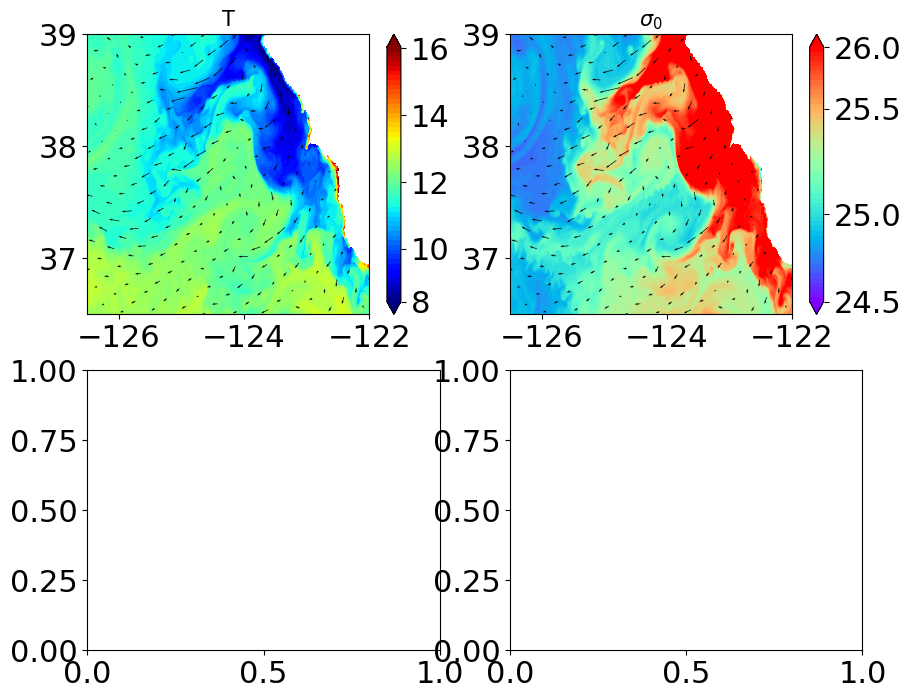

In [15]:
for ixx in range(322,800):
# ixx=0

    fig,ax=plt.subplots(2,2,figsize=(10,8))
    ax=ax.ravel()
    cc1=ax[0].contourf(tf.nav_lon_rho,tf.nav_lat_rho,tf[ixx],cmap='jet',
                       levels=temp_levels,extend='both')
    dec=40
    ax[0].quiver(tf.nav_lon_rho[1:-1,1:-1][::dec,::dec],tf.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

    ax[0].set_xlim(-126.5,-122)
    ax[0].set_ylim(36.5,39)
    cb1=fig.colorbar(cc1, ax=ax[0])
    cb1.set_ticks([8,10,12,14,16])
    ax[0].set_title(r'T',fontsize=15)



    # cc2=ax[1].contourf(sf.nav_lon_rho,sf.nav_lat_rho,sf[ixx],cmap='inferno',
    #                    levels=salt_levels,extend='both')
    # ax[1].quiver(sf.nav_lon_rho[1:-1,1:-1][::dec,::dec],sf.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

    # ax[1].set_xlim(-126.5,-122)
    # ax[1].set_ylim(36.5,39)
    # cb2=fig.colorbar(cc2, ax=ax[1])
    # cb2.set_ticks([32.5,33,33.5,34])
    # ax[1].set_title(r'S',fontsize=15)


    cc2=ax[1].contourf(rho_f.nav_lon_rho,rho_f.nav_lat_rho,rho_f[ixx]-1000,cmap='rainbow',
                       levels=dens_levels,extend='both')
    ax[1].quiver(rho_f.nav_lon_rho[1:-1,1:-1][::dec,::dec],rho_f.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

    ax[1].set_xlim(-126.5,-122)
    ax[1].set_ylim(36.5,39)
    cb2=fig.colorbar(cc2, ax=ax[1])
    cb2.set_ticks([24.5,25,25.5,26],usetex=False)
    ax[1].set_title(r'$\sigma_0$',fontsize=15)






    cc3=ax[2].contourf(wf.nav_lon_rho,wf.nav_lat_rho,wf[ixx],cmap='seismic',
                       levels=wf_levels,extend='both')
    # ax[2].quiver(rho_f.nav_lon_rho[1:-1,1:-1][::dec,::dec],rho_f.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

    ax[2].set_xlim(-126.5,-122)
    ax[2].set_ylim(36.5,39)
    cb3=fig.colorbar(cc3, ax=ax[2])
    cb3.set_ticks([-5e-5,0,5e-5])
    ax[2].set_title(r'w$_s$',fontsize=15,usetex=False)





    cc4=ax[3].contourf(rho_f.nav_lon_rho[1:-1,1:-1],rho_f.nav_lat_rho[1:-1,1:-1],np.sqrt(uf.data[ixx]**2+vf.data[ixx]**2),cmap=cm.cm.speed,levels=np.linspace(0,1,75),extend='both')
    ax[3].quiver(rho_f.nav_lon_rho[1:-1,1:-1][::dec,::dec],rho_f.nav_lat_rho[1:-1,1:-1][::dec,::dec],uf[ixx,::dec,::dec],vf[ixx,::dec,::dec])

    ax[3].set_xlim(-126.5,-122)
    ax[3].set_ylim(36.5,39)
    cb4=fig.colorbar(cc4, ax=ax[3])
    cb4.set_ticks([0,0.5,1])
    ax[3].set_title(r'$|U|$',fontsize=15)



    ax[0].text(-126,39.4,'{0}'.format(t_ind_h[ixx].data),fontsize=10,usetex=False)
    plt.tight_layout()

    plt.savefig('/homes/metogra/iufarias/Documents/figures/smode_help/maps_{0:03}.png'.format(ixx))
    plt.close()

In [ ]:
# for ixx in range(sf.shape[0]-1):

#     fig,ax=plt.subplots(2,4,figsize=(15,6))
#     ax=ax.ravel()
#     cc1=ax[0].contourf(sf.nav_lon_rho,sf.nav_lat_rho,sf[ixx],cmap='inferno',levels=np.linspace(32.3,34,75),extend='both')


#     cb1=fig.colorbar(cc1, ax=ax[0])
#     cb1.set_ticks([32.5,33,33.5,34])

#     ax[0].set_title(r'S (FULL)',fontsize=15)



#     cc2=ax[4].contourf(st.nav_lon_rho,st.nav_lat_rho,st[ixx],cmap='inferno',levels=np.linspace(32.3,34,75),extend='both')

#     cb2=fig.colorbar(cc2, ax=ax[4])
#     cb2.set_ticks([32.5,33,33.5,34])
#     ax[4].set_title(r'S (SMTH)',fontsize=15)



#     cc3=ax[1].contourf(rain_f.nav_lon,rain_f.nav_lat,rain_f[ixx],levels=np.linspace(0,0.001,35),cmap='viridis',extend='both')


#     cb3=fig.colorbar(cc3, ax=ax[1])
#     # cb3.set_ticks([24.5,25.5,26.5])
#     ax[1].set_title('P [mm]',fontsize=15)




#     cc4=ax[5].contourf(rain_t.nav_lon,rain_t.nav_lat,rain_t[ixx],levels=np.linspace(0,0.001,35),cmap='viridis',extend='both')

#     cb4=fig.colorbar(cc4, ax=ax[5])
#     ax[5].set_title('P [mm]',fontsize=15)





#     cc5=ax[2].contourf(tf.nav_lon_rho,tf.nav_lat_rho,tf[ixx],cmap='rainbow',levels=np.linspace(9,15,75),extend='both')

#     cb5=fig.colorbar(cc5, ax=ax[2])
#     cb5.set_ticks([9,10,11,12,13])

#     ax[2].set_title(r'T [C] (FULL)',fontsize=15)



#     cc6=ax[6].contourf(tt.nav_lon_rho,tt.nav_lat_rho,tt[ixx],cmap='rainbow',levels=np.linspace(9,15,75),extend='both')
#     cb6=fig.colorbar(cc6, ax=ax[6])
#     cb6.set_ticks([9,10,11,12,13])
#     ax[6].set_title(r'T [C](SMTH)',fontsize=15)



#     cc7=ax[3].contourf(LH_f.nav_lon,LH_f.nav_lat,LH_f[ixx],levels=np.linspace(-150,150,75),cmap='seismic',extend='both')


#     cb7=fig.colorbar(cc7, ax=ax[3])
#     cb7.set_ticks([-100,-50,0,50,100])


#     # cb3.set_ticks([24.5,25.5,26.5])
#     ax[3].set_title(r'LH [W m$^{-2}$]',fontsize=15)




#     cc8=ax[7].contourf(LH_t.nav_lon,LH_t.nav_lat,LH_t[ixx],levels=np.linspace(-150,150,75),cmap='seismic',extend='both')

#     cb8=fig.colorbar(cc8, ax=ax[7])
#     cb8.set_ticks([-100,-50,0,50,100])


#     # cb4.set_ticks([0,0.5,1])
#     ax[7].set_title(r'LH [W m$^{-2}$]',fontsize=15)



#     ax[0].text(-126,30.4,'{0}'.format(t_ind[ixx].data),fontsize=10)
#     plt.tight_layout()
#     plt.savefig('/homes/metogra/iufarias/Documents/figures/smode_help/S_T_P_LH/salt+precipitation_maps_{0:03}.png'.format(ixx))
#     plt.close()


In [ ]:
# ixx=0
# for ixx in range(sf.shape[0]-1):


#     fig,ax=plt.subplots(1,4,figsize=(16,4))
#     ax=ax.ravel()
#     cc1=ax[0].contourf(sf.nav_lon_rho,sf.nav_lat_rho,(sf[ixx]-st[ixx]),cmap='seismic',levels=np.linspace(-0.5,0.5,35),extend='both')


#     cb1=fig.colorbar(cc1, ax=ax[0])
#     cb1.set_ticks([-0.5,0,0.5])

#     ax[0].set_title(r'S',fontsize=15)



#     cc2=ax[1].contourf(tt.nav_lon_rho,tt.nav_lat_rho,(tf[ixx]-tt[ixx]),cmap='seismic',levels=np.linspace(-1,1,35),extend='both')

#     cb2=fig.colorbar(cc2, ax=ax[1])
#     cb2.set_ticks([-1,-0.5,0,0.5,1])
#     ax[1].set_title(r'T[$^{\circ}$C]',fontsize=15)



#     cc3=ax[2].contourf(rain_f.nav_lon,rain_f.nav_lat,(rain_f[ixx]-rain_t[ixx]),levels=np.linspace(-1e-4,1e-4,75),cmap='seismic',extend='both')


#     cb3=fig.colorbar(cc3, ax=ax[2])
#     cb3.set_ticks([-1e-4,0,1e-4])

#     ax[2].set_title('P [mm]',fontsize=15)



#     cc4=ax[3].contourf(LH_t.nav_lon,LH_t.nav_lat,(LH_f[ixx]-LH_t[ixx]),levels=np.linspace(-30,30,35),cmap='seismic',extend='both')

#     cb4=fig.colorbar(cc4, ax=ax[3])
#     cb4.set_ticks([-25,0,25])
#     cb4.set_label('FULL-SMTH')

#     ax[3].set_title(r'LH [W m$^{-2}$]',fontsize=15)


#     ax[0].text(-126,30.4,'{0}'.format(t_ind[ixx].data),fontsize=10)
#     plt.tight_layout()
#     plt.savefig('/homes/metogra/iufarias/Documents/figures/smode_help/anomaly/salt+precipitation+lh+t+anomaly_maps_{0:03}.png'.format(ixx))
#     plt.close()


